# Question 2: Feature Selection
This task requires that you work with a high dimensional data set with many uninformative features.
The dataset is synthetic but based on a real problem. Download the data at the link  here . Each row is an observation contains the following columns:  
● Subject ID   
● Age  
● Classification  
● 450 unnamed features — but see immediately below  
The unnamed features have a very specific naming convention. They are in groups of 10 ‘metrics’, 9 ‘channels’ each having 5 ‘scales’ (450 total). The goal is to find what metric channel combinations have features that are significantly different for the respective class (‘typ’ vs ‘asd’).  
If the metric-feature is deemed meaningful then it is assumed that all the scales for that metric-channel are meaningful. There could be less than 10 of the 450 features that are meaningful. Please make detailed notes of your thinking and methodologies. When you are complete submit the list of metric-channels that you found to be significant ( A.c5, F.c2... ect).  
Here is an example of the header of the data file:  
'ID', 'age', 'class', 'A.c1.1', 'A.c1.2', 'A.c1.3', 'A.c1.4', 'A.c1.5', 'A.c2.1', ...  
'A.c9.3', 'A.c9.4', 'A.c9.5', 'B.c1.1', 'B.c1.2', 'B.c1.3', 'B.c1.4', ..  

In [1]:
#Fastai imports --> they include a lot of the things we need
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/chuanxu/fastai')
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
data = pd.read_csv('data_challenge.csv')

In [3]:
data.shape

(818, 453)

In [4]:
data.head()

,ID,age,class,A.c1.1,A.c1.2,A.c1.3,A.c1.4,A.c1.5,A.c2.1,A.c2.2,...,J.c8.1,J.c8.2,J.c8.3,J.c8.4,J.c8.5,J.c9.1,J.c9.2,J.c9.3,J.c9.4,J.c9.5
0,5560,3,typ,2.238984,3.238984,4.238984,5.238984,6.238984,2.539386,3.539386,...,2.330630,3.330630,4.330630,5.330630,6.330630,0.105146,1.105146,2.105146,3.105146,4.105146
1,4694,3,typ,1.490947,2.490947,3.490947,4.490947,5.490947,0.692924,1.692924,...,0.033946,1.033946,2.033946,3.033946,4.033946,-0.921489,0.078511,1.078511,2.078511,3.078511
2,6449,3,typ,1.828413,2.828413,3.828413,4.828413,5.828413,2.995978,3.995978,...,-0.309544,0.690456,1.690456,2.690456,3.690456,1.838188,2.838188,3.838188,4.838188,5.838188
3,3008,3,asd,1.930039,2.930039,3.930039,4.930039,5.930039,2.698195,3.698195,...,0.727438,1.727438,2.727438,3.727438,4.727438,2.793029,5.793029,10.793029,17.793029,26.793029
4,3863,3,typ,2.272464,3.272464,4.272464,5.272464,6.272464,1.539144,2.539144,...,2.168858,3.168858,4.168858,5.168858,6.168858,-0.938000,0.062000,1.062000,2.062000,3.062000


In [5]:
data.dtypes

ID          int64
age         int64
class      object
A.c1.1    float64
A.c1.2    float64
A.c1.3    float64
A.c1.4    float64
A.c1.5    float64
A.c2.1    float64
A.c2.2    float64
A.c2.3    float64
A.c2.4    float64
A.c2.5    float64
A.c3.1    float64
A.c3.2    float64
A.c3.3    float64
A.c3.4    float64
A.c3.5    float64
A.c4.1    float64
A.c4.2    float64
A.c4.3    float64
A.c4.4    float64
A.c4.5    float64
A.c5.1    float64
A.c5.2    float64
A.c5.3    float64
A.c5.4    float64
A.c5.5    float64
A.c6.1    float64
A.c6.2    float64
           ...   
J.c4.1    float64
J.c4.2    float64
J.c4.3    float64
J.c4.4    float64
J.c4.5    float64
J.c5.1    float64
J.c5.2    float64
J.c5.3    float64
J.c5.4    float64
J.c5.5    float64
J.c6.1    float64
J.c6.2    float64
J.c6.3    float64
J.c6.4    float64
J.c6.5    float64
J.c7.1    float64
J.c7.2    float64
J.c7.3    float64
J.c7.4    float64
J.c7.5    float64
J.c8.1    float64
J.c8.2    float64
J.c8.3    float64
J.c8.4    float64
J.c8.5    

### change class into numeric labels

In [6]:
uniq = data['class'].unique()
name2idx = {o:i for i,o in enumerate(uniq)}
data['class'] = np.array([name2idx[x] for x in data['class']])

In [7]:
data.head()

,ID,age,class,A.c1.1,A.c1.2,A.c1.3,A.c1.4,A.c1.5,A.c2.1,A.c2.2,...,J.c8.1,J.c8.2,J.c8.3,J.c8.4,J.c8.5,J.c9.1,J.c9.2,J.c9.3,J.c9.4,J.c9.5
0,5560,3,0,2.238984,3.238984,4.238984,5.238984,6.238984,2.539386,3.539386,...,2.330630,3.330630,4.330630,5.330630,6.330630,0.105146,1.105146,2.105146,3.105146,4.105146
1,4694,3,0,1.490947,2.490947,3.490947,4.490947,5.490947,0.692924,1.692924,...,0.033946,1.033946,2.033946,3.033946,4.033946,-0.921489,0.078511,1.078511,2.078511,3.078511
2,6449,3,0,1.828413,2.828413,3.828413,4.828413,5.828413,2.995978,3.995978,...,-0.309544,0.690456,1.690456,2.690456,3.690456,1.838188,2.838188,3.838188,4.838188,5.838188
3,3008,3,1,1.930039,2.930039,3.930039,4.930039,5.930039,2.698195,3.698195,...,0.727438,1.727438,2.727438,3.727438,4.727438,2.793029,5.793029,10.793029,17.793029,26.793029
4,3863,3,0,2.272464,3.272464,4.272464,5.272464,6.272464,1.539144,2.539144,...,2.168858,3.168858,4.168858,5.168858,6.168858,-0.938000,0.062000,1.062000,2.062000,3.062000


### split data into train, val set

In [8]:
np.random.seed(26)
trn_sz = int(data.shape[0] * 0.8)
idxs = np.random.permutation(data.shape[0])
train, val = data.loc[idxs[:trn_sz]], data.loc[idxs[trn_sz:]]

### get feature matrix and label

In [9]:
X_train, y_train = train.drop(['class'], axis = 1), train['class']
X_val, y_val = val.drop(['class'], axis = 1), val['class']
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((654, 452), (654,), (164, 452), (164,))

### fit data into the model

In [10]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evaluate the model performance

In [11]:
def score(clf, X_train, y_train, X_val, y_val):
    return accuracy_score(y_train, clf.predict(X_train)), log_loss(y_train, clf.predict_proba(X_train)),\
           accuracy_score(y_val, clf.predict(X_val)), log_loss(y_val, clf.predict_proba(X_val))

In [12]:
score(clf, X_train, y_train, X_val, y_val)

(1.0, 9.9920072216264128e-16, 1.0, 9.9920072216264128e-16)

This model preforms very well!

### feature importance

In [13]:
fi = rf_feat_importance(clf, X_train)
fi

,cols,imp
236,F.c2.5,0.2
190,E.c2.4,0.2
310,G.c8.4,0.1
311,G.c8.5,0.1
306,G.c7.5,0.1
191,E.c2.5,0.1
326,H.c2.5,0.1
309,G.c8.3,0.1
291,G.c4.5,0.0
301,G.c6.5,0.0


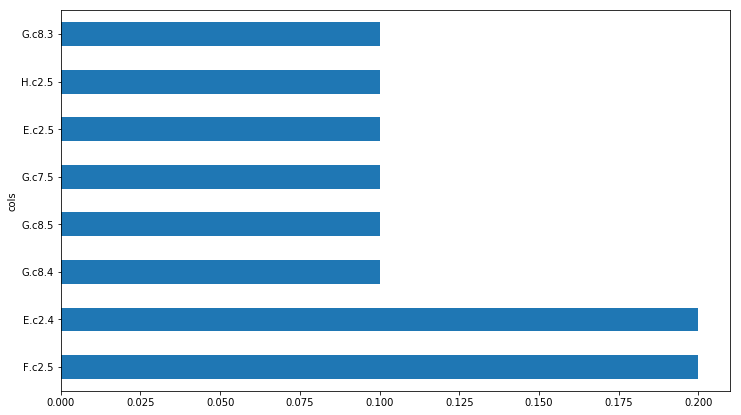

In [14]:
fi[:8].plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

### choose 8 most important features

In [15]:
X_train, X_val = X_train[fi[:8].cols], X_val[fi[:8].cols]

In [16]:
X_train.shape, X_val.shape

((654, 8), (164, 8))

### feed the data into model again

In [17]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=10)
clf.fit(X_train, y_train)
score(clf, X_train, y_train, X_val, y_val)

(1.0, 9.9920072216264128e-16, 1.0, 9.9920072216264128e-16)

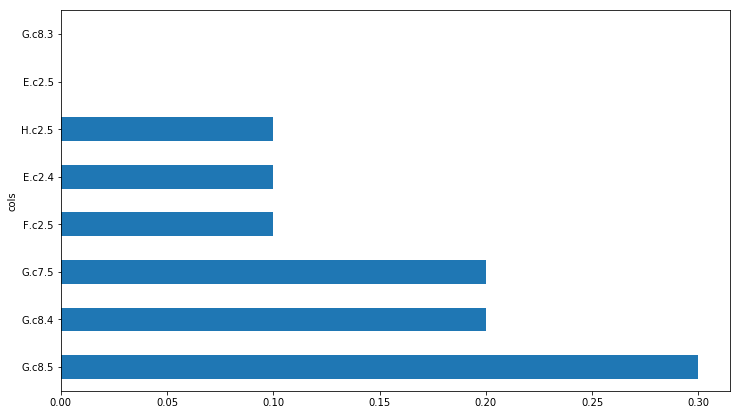

In [18]:
fi = rf_feat_importance(clf, X_train)
fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

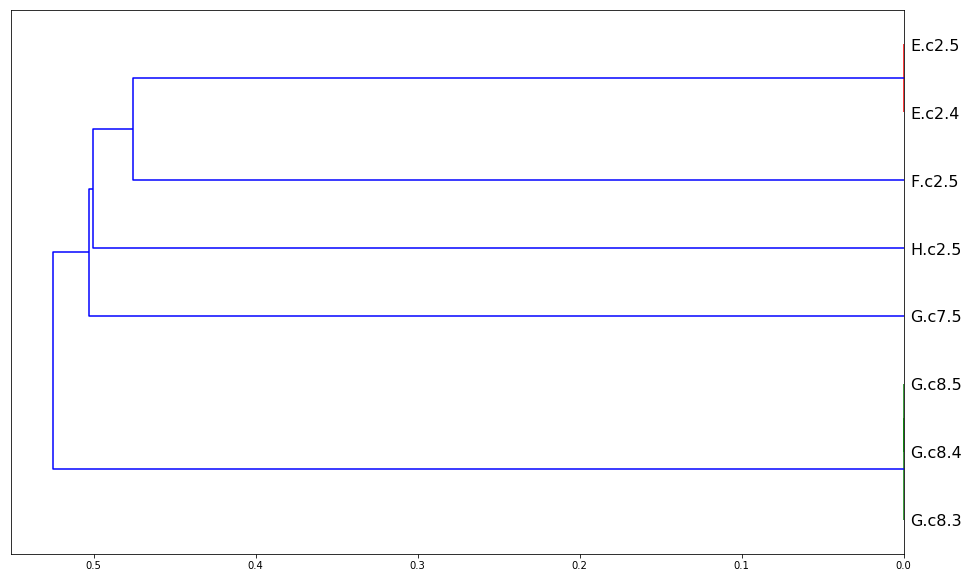

In [19]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=16)
plt.show()

This model still preforms very well, but we cut the feature number from 452 to 8! The features we keep are `F.c2.5`, `E.c2.4`, `G.c8.4`, `G.c8.5`, `G.c7.5`, `E.c2.5`, `H.c2.5`, `G.c8.3`. However, data from the same channel basically gives you the same information, so we probably should gourp them first.

### group channels

In [20]:
data_not_channel = data[['ID', 'age', 'class']]
data_channel = data.drop(['ID', 'age', 'class'], axis=1)

In [21]:
data_channel_grouped = data_channel.T.groupby([s[:-2] for s in data_channel.T.index.values]).mean().T
data_channel_grouped.head()

,A.c1,A.c2,A.c3,A.c4,A.c5,A.c6,A.c7,A.c8,A.c9,B.c1,...,I.c9,J.c1,J.c2,J.c3,J.c4,J.c5,J.c6,J.c7,J.c8,J.c9
0,4.238984,4.539386,4.541088,2.062964,2.899645,1.786109,4.353704,3.929622,3.747618,4.845404,...,2.633625,3.335955,3.907140,4.293333,2.228228,3.646986,2.148187,3.082535,4.330630,2.105146
1,3.490947,2.692924,2.190754,1.429273,1.946826,1.851657,4.302024,3.522193,2.092856,3.444733,...,4.789479,4.198315,1.309413,3.654526,4.463084,3.255335,2.478645,1.429978,2.033946,1.078511
2,3.828413,4.995978,4.137490,1.688580,1.261860,2.026915,4.915171,1.685951,3.027844,2.190590,...,2.229601,2.453383,1.757547,1.849968,4.897279,2.246499,1.940910,2.783556,1.690456,3.838188
3,3.930039,4.698195,3.891668,2.753197,3.927789,4.482845,3.990717,4.561742,12.538395,9.720180,...,3.074072,1.748670,3.959083,2.178771,3.117515,1.708117,3.296106,2.431616,2.727438,12.793029
4,4.272464,3.539144,4.704874,3.624839,2.246552,2.537058,3.322495,3.344927,2.652929,2.411557,...,4.994283,1.238300,3.554937,2.440474,1.771859,1.426768,4.318616,4.255768,4.168858,1.062000


In [22]:
data_grouped = pd.concat([data_not_channel, data_channel_grouped], axis=1)
data_grouped.head()

,ID,age,class,A.c1,A.c2,A.c3,A.c4,A.c5,A.c6,A.c7,...,I.c9,J.c1,J.c2,J.c3,J.c4,J.c5,J.c6,J.c7,J.c8,J.c9
0,5560,3,0,4.238984,4.539386,4.541088,2.062964,2.899645,1.786109,4.353704,...,2.633625,3.335955,3.907140,4.293333,2.228228,3.646986,2.148187,3.082535,4.330630,2.105146
1,4694,3,0,3.490947,2.692924,2.190754,1.429273,1.946826,1.851657,4.302024,...,4.789479,4.198315,1.309413,3.654526,4.463084,3.255335,2.478645,1.429978,2.033946,1.078511
2,6449,3,0,3.828413,4.995978,4.137490,1.688580,1.261860,2.026915,4.915171,...,2.229601,2.453383,1.757547,1.849968,4.897279,2.246499,1.940910,2.783556,1.690456,3.838188
3,3008,3,1,3.930039,4.698195,3.891668,2.753197,3.927789,4.482845,3.990717,...,3.074072,1.748670,3.959083,2.178771,3.117515,1.708117,3.296106,2.431616,2.727438,12.793029
4,3863,3,0,4.272464,3.539144,4.704874,3.624839,2.246552,2.537058,3.322495,...,4.994283,1.238300,3.554937,2.440474,1.771859,1.426768,4.318616,4.255768,4.168858,1.062000


### split train, val and get X, y

In [23]:
train, val = data_grouped.loc[idxs[:trn_sz]], data_grouped.loc[idxs[trn_sz:]]
X_train, y_train = train.drop(['class'], axis = 1), train['class']
X_val, y_val = val.drop(['class'], axis = 1), val['class']
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((654, 92), (654,), (164, 92), (164,))

### fit the model and evaluate it

In [24]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=10)
clf.fit(X_train, y_train)
score(clf, X_train, y_train, X_val, y_val)

(1.0, 0.00016110170589981462, 1.0, 0.0012848843372915515)

This model still performs well!

### do feature importance again

In [25]:
fi = rf_feat_importance(clf, X_train)
fi

,cols,imp
39,E.c2,0.300000
13,B.c3,0.195336
10,A.c9,0.188981
62,G.c7,0.100000
63,G.c8,0.100000
66,H.c2,0.094158
76,I.c3,0.008103
15,B.c5,0.005008
5,A.c4,0.003202
2,A.c1,0.002917


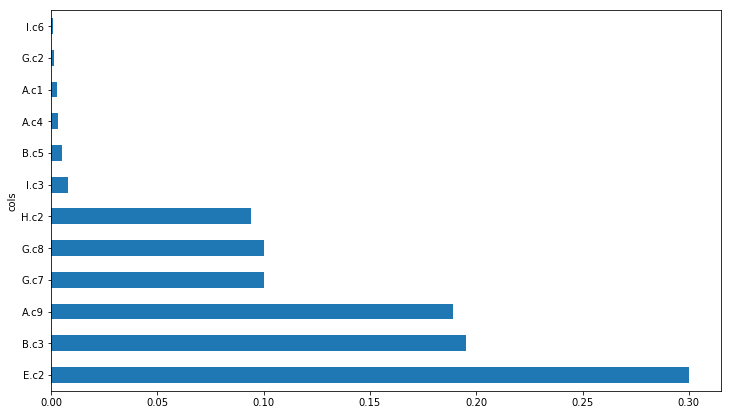

In [26]:
fi[:12].plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [27]:
X_train, X_val = X_train[fi[:12].cols], X_val[fi[:12].cols]
X_train.shape, X_val.shape

((654, 12), (164, 12))

In [28]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=10)
clf.fit(X_train, y_train)
score(clf, X_train, y_train, X_val, y_val)

(1.0, 9.9920072216264128e-16, 1.0, 9.9920072216264128e-16)

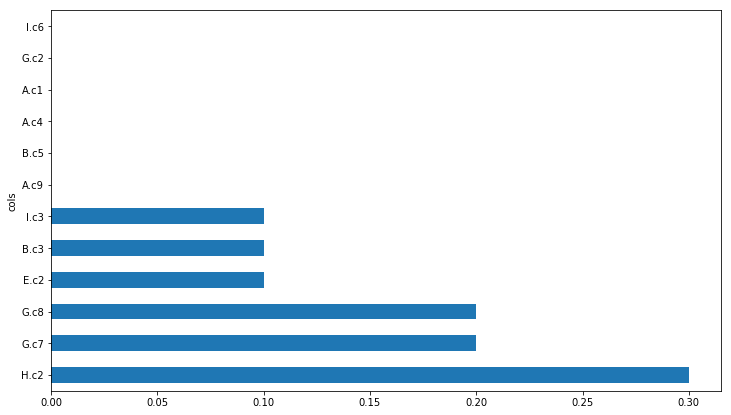

In [29]:
fi = rf_feat_importance(clf, X_train)
fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

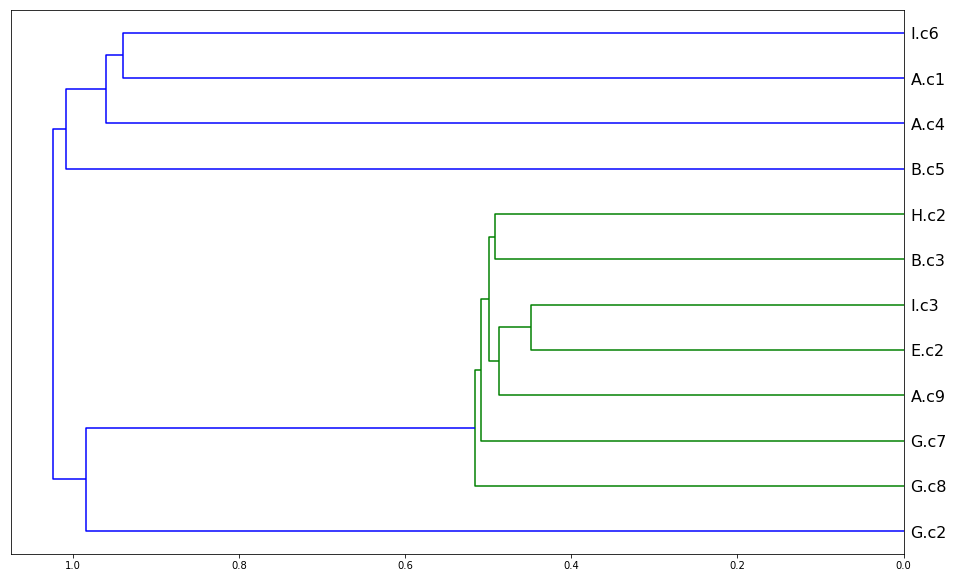

In [30]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=16)
plt.show()

In [31]:
X_train, X_val = X_train[fi[:6].cols], X_val[fi[:6].cols]
X_train.shape, X_val.shape

((654, 6), (164, 6))

In [32]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=10)
clf.fit(X_train, y_train)
score(clf, X_train, y_train, X_val, y_val)

(1.0, 9.9920072216264128e-16, 1.0, 9.9920072216264128e-16)

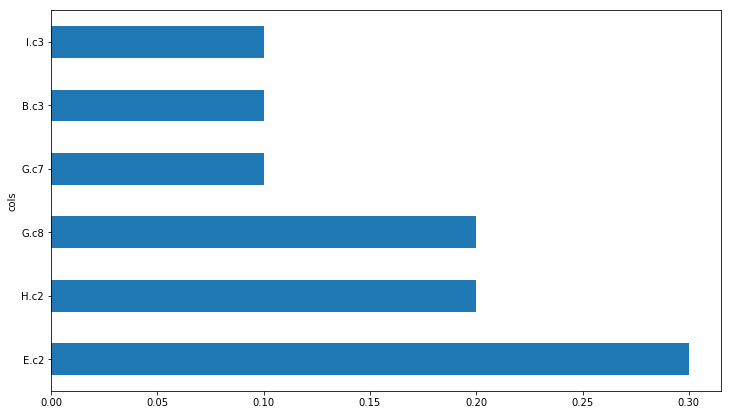

In [33]:
fi = rf_feat_importance(clf, X_train)
fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

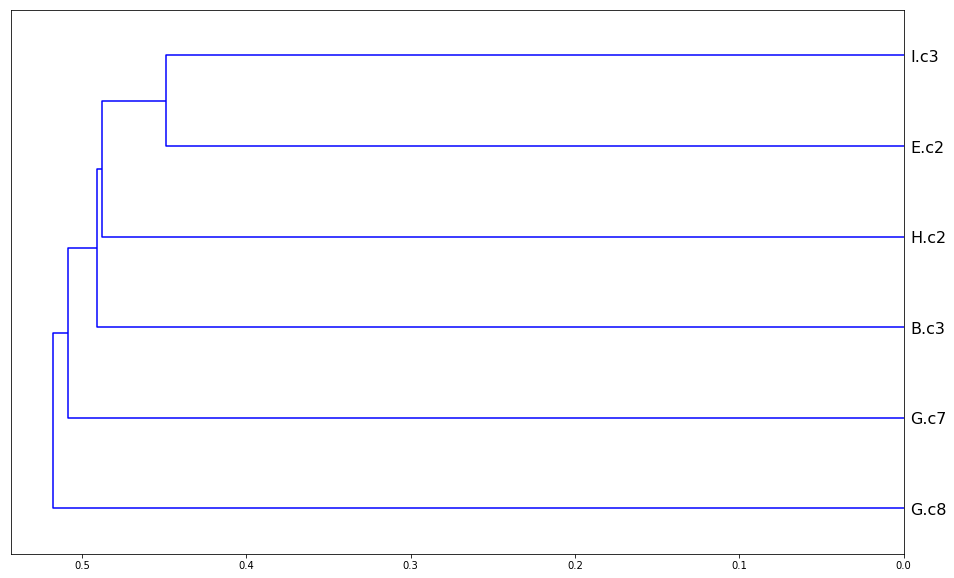

In [34]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=16)
plt.show()

The channels we keep are `E.c2`, `G.c7`, `H.c2`, `G.c8`, `Bc.3`, `I.c3`.